In [1]:
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import dataset
train= pd.read_csv("C:/Users/happy/Desktop/Strathclyde academic/Sem 2/CS986/Assignment/Score/CS98XRegressionTrain.csv",low_memory=False)
test= pd.read_csv("C:/Users/happy/Desktop/Strathclyde academic/Sem 2/CS986/Assignment/Score/CS98XRegressionTest.csv",low_memory=False)

In [3]:
#check info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [4]:
#check info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         114 non-null    int64 
 1   title      114 non-null    object
 2   artist     114 non-null    object
 3   top genre  113 non-null    object
 4   year       114 non-null    int64 
 5   bpm        114 non-null    int64 
 6   nrgy       114 non-null    int64 
 7   dnce       114 non-null    int64 
 8   dB         114 non-null    int64 
 9   live       114 non-null    int64 
 10  val        114 non-null    int64 
 11  dur        114 non-null    int64 
 12  acous      114 non-null    int64 
 13  spch       114 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 12.6+ KB


In [5]:
train.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [6]:
#check missing
train.isnull().any()

Id           False
title        False
artist       False
top genre     True
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

In [7]:
#check missing
test.isnull().any()

Id           False
title        False
artist       False
top genre     True
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
dtype: bool

In [8]:
incomplete_train = train[train.isnull().any(axis=1)].head()
incomplete_train 

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
8,9,Someone Elses Roses,Joan Regan,NaN,2019,100,14,29,-10,15,32,143,89,3,34
26,27,Drinks On The House,Green Martini Keys,NaN,2016,97,16,57,-16,11,15,181,100,5,28
72,73,Pachuko Hop,Ike Carpenter Orchestra,NaN,2006,83,53,48,-9,34,80,135,59,3,28
90,91,Little Things Means A Lot,Jayne Mansfield,NaN,2008,109,29,70,-15,16,63,172,36,4,29


In [9]:
# drop na in train
train=train.dropna(subset=["top genre"])

In [10]:
incomplete_test = test[test.isnull().any(axis=1)].head()
incomplete_test

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
66,520,We Are The World,U.S.A. For Africa,NaN,1985,73,45,53,-15,7,29,427,19,4


In [11]:
# drop na in test
test=test.dropna(subset=["top genre"])

In [12]:
# check missing
train.isnull().any()

Id           False
title        False
artist       False
top genre    False
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

In [13]:
# check missing
test.isnull().any()

Id           False
title        False
artist       False
top genre    False
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
dtype: bool

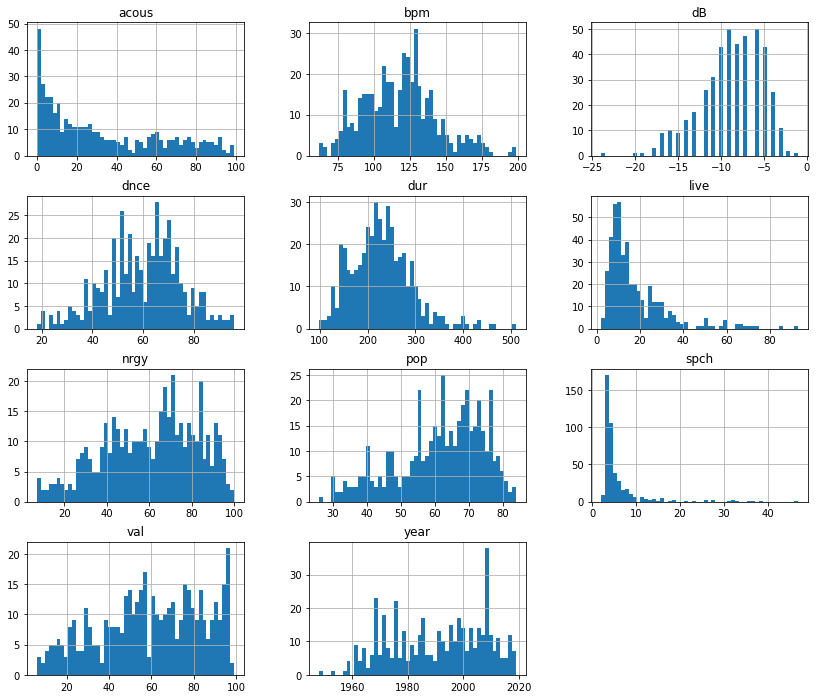

In [14]:
%matplotlib inline
train.drop(['Id'],axis=1).hist(bins=50, figsize=(14,12))
plt.show()

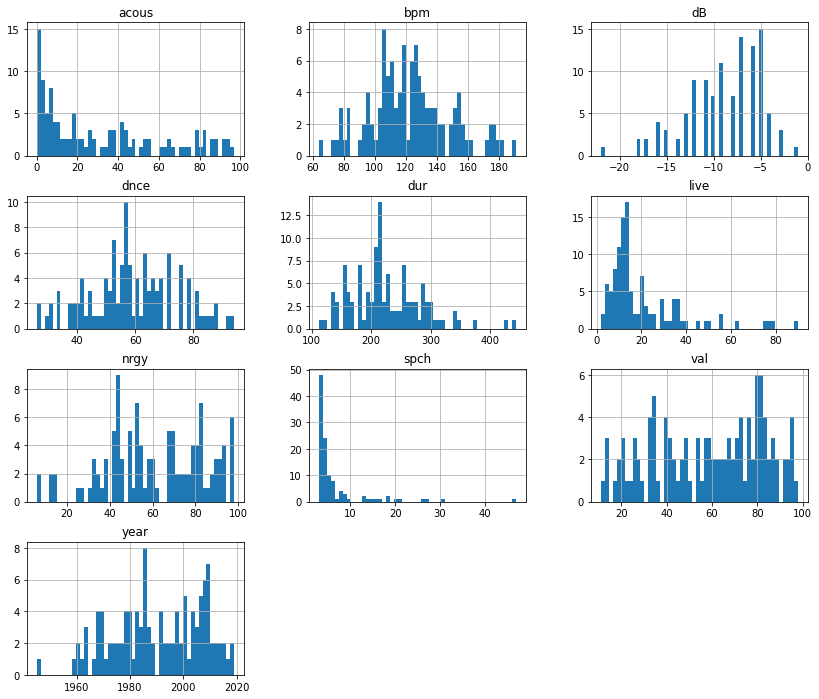

In [47]:
%matplotlib inline
test.drop(['Id'],axis=1).hist(bins=50, figsize=(14,12))
plt.show()

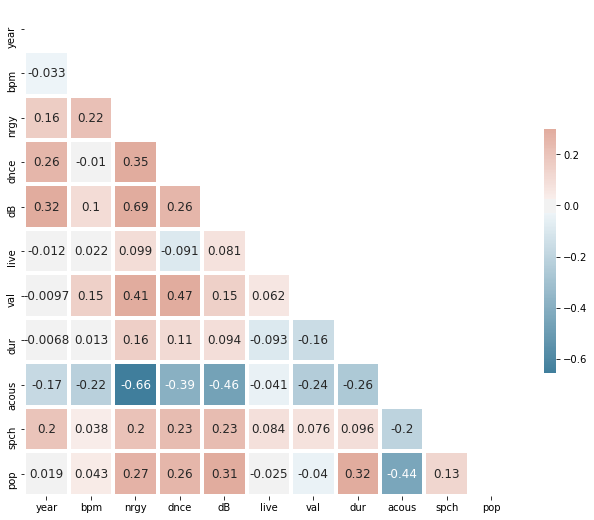

In [15]:
#train set
# Compute the correlation matrix and drop Id
corr = train.drop(['Id'],axis=1).corr()

# Add a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=3, cbar_kws={"shrink": .5},annot = True, annot_kws = {'size': 12})

In [ ]:
# pop is most correlated with acous. We go back to compare the distribution of acous in train and test sets. 
# The distribution seems similar so we can conclude both sets are not biased from each other.

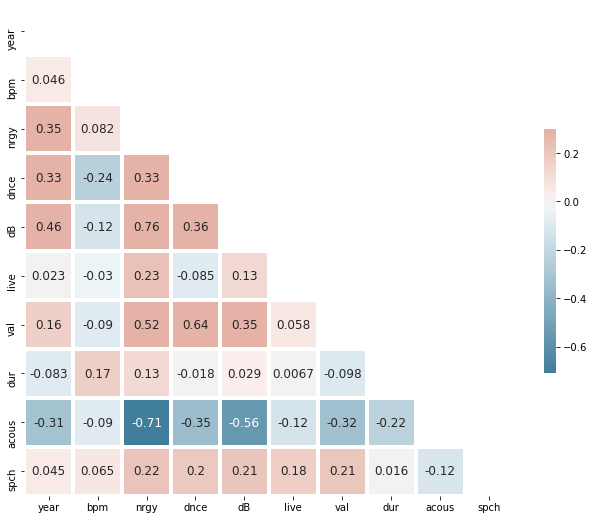

In [16]:
#test set
# Compute the correlation matrix and drop Id
corr = test.drop(['Id'],axis=1).corr()

# Add a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=3, cbar_kws={"shrink": .5},annot = True, annot_kws = {'size': 12})

In [ ]:
# categorical recode

In [17]:
#rename top genre
train.rename(columns={'top genre':'top_genre'}, inplace=True)
test.rename(columns={'top genre':'top_genre'}, inplace=True)

In [18]:
# make a copy of top_genre for onehotencoder
top_genre_cat= train["top_genre"]
top_genre_cat.head()

0    adult standards
2    adult standards
3    adult standards
4          glam rock
5                pop
Name: top_genre, dtype: object

In [87]:
top_genre_cat.info()
# the error means this is a series. The factorize funciton will only work on series and not dataframe.
# note: change to dataframe: top_genre_cat= train[["top_genre"]]

AttributeError: 'Series' object has no attribute 'info'

In [19]:
# top_genre_cat_encoded as codes
# top_genre_cat_name as category names

top_genre_cat_encoded, top_genre_cat_name = top_genre_cat.factorize()
top_genre_cat_encoded

array([ 0,  0,  0,  1,  2,  3,  4,  0,  4,  1,  5,  5,  6,  5,  7,  8,  3,
        9,  1,  0, 10,  4, 11, 12, 13, 14,  3,  9,  9, 13, 15,  0, 16,  9,
        3,  9, 10,  0,  8,  0,  9, 17,  3,  0, 18, 19,  2, 20, 21, 22,  0,
        3,  5,  3, 23, 19, 24,  3, 23,  9, 25,  1,  9,  9,  0,  0, 18,  0,
        3,  0,  9, 26,  3,  0, 27,  9, 12, 16,  9,  0, 28,  2,  9, 29, 30,
       19,  9, 31, 32, 19,  5,  0,  3,  1, 20,  3,  3,  0,  3,  5, 10,  0,
       33, 34,  9, 21, 35,  7, 36,  3, 37,  9,  0,  1, 22,  9,  0, 30, 38,
        9, 39,  3,  9, 40, 19, 16, 31,  3,  0,  0,  9,  3, 10,  3, 23,  0,
        9,  0, 41,  4, 13,  1, 42, 43,  3,  0, 44,  9,  3, 12,  3,  0,  3,
        9,  3,  3,  1,  9,  0, 21, 21,  3,  3, 45,  0, 46,  3, 28,  5,  0,
       19,  0, 15,  3,  9, 11,  1,  9, 47, 12,  3,  4,  9,  3, 10,  0, 15,
       46, 21, 48, 15,  0, 39, 28,  9,  0,  9,  9, 49, 50,  1, 22,  3, 10,
        3,  3, 19, 51, 13, 52, 13,  0,  0, 25, 44, 53,  3,  0,  0,  3,  4,
       44, 54,  3, 55, 19

In [20]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
# Need to reshape into 2-d array
top_genre_cat_1hot = cat_encoder.fit_transform(top_genre_cat_encoded.reshape(-1,1))
top_genre_cat_1hot

<438x86 sparse matrix of type '<class 'numpy.float64'>'
	with 438 stored elements in Compressed Sparse Row format>

In [21]:
# view coded categories
cat_encoder.categories_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85], dtype=int64)]

In [22]:
# view categories
top_genre_cat_name

Index(['adult standards', 'glam rock', 'pop', 'album rock', 'boy band',
       'brill building pop', 'rock-and-roll', 'country rock', 'canadian pop',
       'dance pop', 'europop', 'bebop', 'art rock', 'disco', 'blues',
       'barbadian pop', 'deep adult standards', 'deep house', 'atl hip hop',
       'dance rock', 'disco house', 'bubblegum dance', 'classic soul',
       'classic uk pop', 'east coast hip hop', 'doo-wop', 'britpop',
       'british blues', 'soft rock', 'australian talent show', 'art pop',
       'british soul', 'british invasion', 'belgian pop', 'big room',
       'german dance', 'italian pop', 'british folk', 'brit funk',
       'chicago soul', 'neo mellow', 'british comedy', 'hip hop',
       'new wave pop', 'eurodance', 'detroit hip hop', 'classic rock',
       'uk garage', 'afrobeat', 'r&b', 'chicago rap', 'classic danish pop',
       'british dance band', 'drone folk', 'permanent wave', 'merseybeat',
       'g funk', 'blues rock', 'celtic rock', 'bow pop', 'austra

In [23]:
# CODES FROM TEXTBOOK DOESN"T WORK!!!!! OMITTED AND SUBSTITUE WITH OTHER CODES BELOW!

enc_data = pd.DataFrame(top_genre_cat_1hot.toarray())
# This is the column name
enc_data.columns = top_genre_cat_name
# This is the row index
enc_data.index = train.index

train_prepared = train.join(enc_data)

ValueError: columns overlap but no suffix specified: Index(['pop'], dtype='object')

In [24]:
# View data
enc_data = pd.DataFrame(top_genre_cat_1hot.toarray())
enc_data

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
434,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Replace column codes with column names
enc_data.columns = top_genre_cat_name
enc_data

,adult standards,glam rock,pop,album rock,boy band,brill building pop,rock-and-roll,country rock,canadian pop,dance pop,...,hi-nrg,louisiana blues,hip pop,mellow gold,avant-garde jazz,bronx hip hop,glam punk,german alternative rock,acoustic blues,alternative rock
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
434,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
train_prepared= pd.merge(train,enc_data,left_index=True,right_index=True)
train_prepared

,Id,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,...,hi-nrg,louisiana blues,hip pop,mellow gold,avant-garde jazz,bronx hip hop,glam punk,german alternative rock,acoustic blues,alternative rock
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,Grenade,Bruno Mars,pop,2010,110,56,71,-7,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,434,Leaving Trunk,Taj Mahal,acoustic blues,1968,174,50,54,-11,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
434,435,Honey,Bobby Goldsboro,adult standards,2008,93,35,50,-10,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,436,More And More - Single Version,Captain Hollywood Project,bubblegum dance,1993,126,85,66,-12,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,437,I Knew You Were Trouble.,Taylor Swift,dance pop,2012,77,47,62,-7,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Tasks completed: 
# 1. removed NAs
# 2. recoded categorical variable top genre